In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings; warnings.simplefilter('ignore')

In [2]:
file = pd.read_csv('survey_data.csv', sep =',')
total_responses =len(file)
print("The total number of responses received is {}.\n".format(len(file)))

The total number of responses received is 88.



In [3]:
file.columns

Index(['ID de la réponse', 'Date de soumission', 'Dernière page',
       'Langue de départ', 'Tête de série', 'Date de lancement',
       'Date de la dernière action', 'Adresse IP', 'URL référente',
       'Nom &amp; Post-nom /Firstname and Surname',
       ...
       'Durée pour la question: conn08', 'Durée pour la question: conn09',
       'Durée pour la question: conn10', 'Durée pour la question: conn11',
       'Durée pour le groupe : MESURAGE D'INTERNET',
       'Durée pour la question: meas01', 'Durée pour la question: meas02',
       'Durée pour la question: meas03', 'Durée pour la question: meas04',
       'Durée pour la question: meas05'],
      dtype='object', length=205)

In [4]:
file = file.drop(file.filter(regex='Durée').columns, axis=1)
file = file.drop(file.filter(regex='URL').columns, axis=1)
file = file.drop(file.columns[[range(0,7)]], axis=1)


In [5]:
file.rename(columns={file.columns[0]: 'IP'
                    , file.columns[1]: 'names'\
                    , file.columns[2]: 'genderM'\
                    ,file.columns[3]: 'genderF'\
                    ,file.columns[4]: 'otherGender'\
                     ,file.columns[5]: 'noAgegroup'\
                     ,file.columns[6]: 'age18_25'\
                     ,file.columns[7]: 'age26_35'\
                     ,file.columns[8]: 'age36_45'\
                     ,file.columns[9]: 'age46_55'\
                     ,file.columns[10]: 'age56+'\
                     ,file.columns[37]: 'town'\
                     , file.columns[38]: 'student'\
                     , file.columns[39]: 'self_employed'\
                     ,file.columns[40]: 'employed'\
                     ,file.columns[41]: 'unemployed'\
                     ,file.columns[42]: 'otherOccupation'\
                     ,file.columns[99]: 'speedtest_veryconcerned'\
                     ,file.columns[100]: 'speedtest_concerned'\
                     ,file.columns[101]: 'speedtest_notconcerned'\
                     ,file.columns[102]: 'speedtest_dontcare'\
                     ,file.columns[103]: 'internet_verysatisfied'\
                     ,file.columns[105]: 'internet_satisfied'\
                     ,file.columns[107]: 'internet_neutral'\
                     ,file.columns[109]: 'internet_dissatisfied'\
                     ,file.columns[111]: 'internet_verydissastisfied'\
                     ,file.columns[131]: 'promise1_3mbps'\
                     ,file.columns[132]: 'promise5_10mbps'\
                     ,file.columns[133]: 'promiseless_25mbps'\
                     ,file.columns[134]: 'promisemore_1gbps'\
                     ,file.columns[135]: 'promise_notaware'\
                     ,file.columns[136]: 'percievedspeed1_3mbps'\
                     ,file.columns[137]: 'percievedspeed5_10mbps'\
                     ,file.columns[138]: 'percievedspeed_25mbps'\
                     ,file.columns[139]: 'percievedspeed_1gbps'\
                     ,file.columns[140]: 'percievedspeed_notaware'\
                     ,file.columns[68]: 'qoe_pageloadingtime'\
                     ,file.columns[69]: 'qoe_livevideofreezes'\
                     ,file.columns[70]: 'qoe_voicecalldropouts'\
                     ,file.columns[71]: 'qoe_videocalldropouts'\
                     ,file.columns[72]: 'qoe_textmessagedeliverydelays'\
#                      ,file.columns[91]: 'Airtel'\
#                      ,file.columns[92]: 'Vodacom'\
#                      ,file.columns[93]: 'Orange'\
#                      ,file.columns[95]: 'OtherISP'\
                     
                     
                     
                     
                     
                     
                    }, inplace=True)


In [6]:
#count the responses and the towns 
df = file
print("Total Number of responses: {}".format(len(df)))
print("Number of towns that responded: {}".format(len(df['town'].value_counts())))#minus 1 of 'Other'
print("Responses with no country specified: {}\n".format(len(df[df['town'] == ""])))

Total Number of responses: 88
Number of towns that responded: 13
Responses with no country specified: 0



In [7]:
df['internet_satisfied'].value_counts(normalize=True).sort_index()

Non    0.693182
Oui    0.306818
Name: internet_satisfied, dtype: float64

In [8]:
# #participants who are unaware of their promissed speeds
runm = len(df[['student', 'self_employed', 'employed','unemployed','otherOccupation']][df['promise_notaware']=="Oui"])
runperc = round(runm/len(df)*100, 2)
print("Total number participants are unaware of their promised speeds: {} or {}% of all responses"\
      .format(runm, runperc))

Total number participants are unaware of their promised speeds: 31 or 35.23% of all responses


In [9]:
#percent of elements
def calc_percent(element, df):
    percentage = round(element/len(df)*100, 2)
    return percentage

In [10]:
#survey participants per occupation
students = len(df[df['student']=='Oui'])
self_employed = len(df[df['self_employed']=='Oui'])
employed = len(df[df['employed']=='Oui'])
unemployed = len(df[df['unemployed']=='Oui'])
otherOccupation = len(df[df['otherOccupation']=='Oui'])

print (""" Participants per occupation: '\n'
        - students : {} or {}% '\n'
        - selfemployed : {} or {}% '\n'
        - employed : {} or {}% '\n'
        - unemployed : {} or {}% '\n'
        - others : {} or {}% '\n' """\
      .format(students,calc_percent(students,df),self_employed,calc_percent(self_employed,df),
              employed,calc_percent(employed,df), unemployed,calc_percent(unemployed,df),
              otherOccupation,calc_percent(otherOccupation,df)
             ))
    

 Participants per occupation: '
'
        - students : 30 or 34.09% '
'
        - selfemployed : 26 or 29.55% '
'
        - employed : 30 or 34.09% '
'
        - unemployed : 10 or 11.36% '
'
        - others : 0 or 0.0% '
' 


In [11]:
#Number of Response by town
df1 = df.set_index('town')
print("\nNumber of towns that responded: {}".format(len(df1.index.unique()) - 1))
count = {}
for i in df1.index.unique().tolist():
    name = str(i)
    length = len(df1.loc[name])
    if length >150:
        length =1
    count.update({name:length })
count


Number of towns that responded: 12


{'Goma': 31,
 'Kinshasa': 26,
 'Lubumbashi': 8,
 'Kananga': 1,
 'Isiro': 1,
 'Bukavu': 11,
 'Mbujimayi': 1,
 'Beni': 4,
 'Bunia': 1,
 'Nord kivu': 1,
 'Moba': 1,
 'Kambove': 1,
 'Kisangani': 1}

In [12]:
def makeup():
    towns={}
    for i in df['town'].unique().tolist():
        if i != '':
            name = str(i)
            length = len(df.loc[df['town'] == name])
            towns.update({name:length })
    towns = {k: v for k, v in sorted(towns.items(), reverse=True, key=lambda x: x[1])} 
    return towns
towns = makeup()
town_names = towns.keys()
town_count= towns.values()

towns_repartition = pd.DataFrame()
towns_repartition ['town'] = town_names
towns_repartition['counts'] = town_count
towns_repartition['counts'] = towns_repartition['counts'].astype(int)
towns_repartition['town'] = towns_repartition['town'].astype(str)
towns_repartition

,town,counts
0,Goma,31
1,Kinshasa,26
2,Bukavu,11
3,Lubumbashi,8
4,Beni,4
5,Kananga,1
6,Isiro,1
7,Mbujimayi,1
8,Bunia,1
9,Nord kivu,1


In [13]:
#Number of responses by occupation and whether they are satisfied of their internet experience

satisfied = df[['town','internet_verysatisfied','internet_satisfied','internet_neutral', 'internet_dissatisfied','internet_verydissastisfied']][df['internet_satisfied']=="Oui"]
satisfied = satisfied.groupby('town').agg({'internet_satisfied': 'count'})
responses = pd.Series(count)
final =  pd.concat([responses,satisfied], axis=1, join='outer')
final.fillna(0, inplace=True)
final['internet_satisfied'] = final['internet_satisfied'].astype(int)
final.rename(columns={final.columns[0]: 'Total Number of Responses',
                 'internet_satisfied':'satisfied users'}, inplace=True)
final['% satisfied'] = round((final['satisfied users'\
                                              ]/final['Total Number of Responses'])*100, 2)

internet_verysatisfied = df[['town','internet_verysatisfied','internet_satisfied','internet_neutral', 'internet_dissatisfied','internet_verydissastisfied']][df['internet_verysatisfied']=="Oui"]
internet_verysatisfied = internet_verysatisfied.groupby('town').agg({'internet_verysatisfied': 'count'})

internet_neutral = df[['town','internet_verysatisfied','internet_satisfied','internet_neutral', 'internet_dissatisfied','internet_verydissastisfied']][df['internet_neutral']=="Oui"]
internet_neutral = internet_neutral.groupby('town').agg({'internet_neutral': 'count'})
final =  pd.concat([final,internet_neutral], axis=1, join='outer')
final.fillna(0, inplace=True)
final['internet_neutral'] = final['internet_neutral'].astype(int)
final.rename(columns={'internet_neutral':'neutral users'}, inplace=True)
final['% neutral'] = round((final['neutral users'\
                                              ]/final['Total Number of Responses'])*100, 2)


internet_dissatisfied = df[['town','internet_verysatisfied','internet_satisfied','internet_neutral', 'internet_dissatisfied','internet_verydissastisfied']][df['internet_dissatisfied']=="Oui"]
internet_dissatisfied = internet_dissatisfied.groupby('town').agg({'internet_dissatisfied': 'count'})
final =  pd.concat([final,internet_dissatisfied], axis=1, join='outer')
final.fillna(0, inplace=True)
final['internet_dissatisfied'] = final['internet_dissatisfied'].astype(int)
final.rename(columns={'internet_dissatisfied':'dis-satisfied users'}, inplace=True)
final['% dis-satisfied'] = round((final['dis-satisfied users'\
                                              ]/final['Total Number of Responses'])*100, 2)



# satisfied.reset_index(inplace =True)
# satisfied = satisfied.rename(columns = {'index':'town'})
satisfied = satisfied.sort_values(by = ['internet_satisfied'], ascending=False)
internet_verysatisfied = internet_verysatisfied.sort_values(by = ['internet_verysatisfied'], ascending=False)
internet_neutral = internet_neutral.sort_values(by = ['internet_neutral'], ascending=False)
internet_dissatisfied = internet_dissatisfied.sort_values(by = ['internet_dissatisfied'], ascending=False)

# airtel = airtel.sort_values(by = ['Airtel'], ascending=False)
# vodacom = vodacom.sort_values(by = ['Vodacom'], ascending=False)
# orange = orange.sort_values(by = ['Orange'], ascending=False)
# otherIsp = otherIsp.sort_values(by = ['OtherISP'], ascending=False)

final

,Total Number of Responses,satisfied users,% satisfied,neutral users,% neutral,dis-satisfied users,% dis-satisfied
Goma,31,7,22.58,7,22.58,16,51.61
Kinshasa,26,13,50.00,8,30.77,4,15.38
Lubumbashi,8,4,50.00,0,0.00,1,12.50
Kananga,1,1,100.00,0,0.00,0,0.00
Isiro,1,1,100.00,0,0.00,0,0.00
Bukavu,11,0,0.00,6,54.55,4,36.36
Mbujimayi,1,0,0.00,0,0.00,1,100.00
Beni,4,0,0.00,1,25.00,0,0.00
Bunia,1,0,0.00,0,0.00,1,100.00
Nord kivu,1,1,100.00,0,0.00,0,0.00


In [14]:
# #participant networks

# airtel = df[['town','Airtel']][df['Airtel']=="Oui"]
# airtel = airtel.groupby('town').agg({'Airtel': 'count'})
# responses = pd.Series(count)
# networks_df =  pd.concat([responses,airtel], axis=1, join='outer')
# networks_df.fillna(0, inplace=True)
# networks_df['Airtel'] = networks_df['Airtel'].astype(int)
# networks_df.rename(columns={networks_df.columns[0]: 'Total Number of Responses'}, inplace=True)
# networks_df['% Airtel'] = round((networks_df['Airtel'\
#                                         ]/networks_df['Total Number of Responses'])*100, 2)

# vodacom = df[['town','Vodacom']][df['Vodacom']=="Oui"]
# vodacom = vodacom.groupby('town').agg({'Vodacom': 'count'})
# networks_df =  pd.concat([networks_df,vodacom], axis=1, join='outer')
# networks_df.fillna(0, inplace=True)
# networks_df['Vodacom'] = networks_df['Vodacom'].astype(int)
# networks_df['% Vodacom'] = round((networks_df['Vodacom'\
#                                         ]/networks_df['Total Number of Responses'])*100, 2)

# orange = df[['town','Orange']][df['Orange']=="Oui"]
# orange = orange.groupby('town').agg({'Orange': 'count'})
# networks_df =  pd.concat([networks_df,orange], axis=1, join='outer')
# networks_df.fillna(0, inplace=True)
# networks_df['Orange'] = networks_df['Orange'].astype(int)
# networks_df['% Orange'] = round((networks_df['Orange'\
#                                         ]/networks_df['Total Number of Responses'])*100, 2)

# otherIsp = df[['town','OtherISP']][df['OtherISP']=="Oui"]
# otherIsp = otherIsp.groupby('town').agg({'OtherISP': 'count'})
# networks_df =  pd.concat([networks_df,otherIsp], axis=1, join='outer')
# networks_df.fillna(0, inplace=True)
# networks_df['OtherISP'] = networks_df['OtherISP'].astype(int)
# networks_df['% OtherISP'] = round((networks_df['OtherISP'\
#                                         ]/networks_df['Total Number of Responses'])*100, 2)

# # networks_df.reset_index(inplace =True)
# # networks_df = networks_df.drop('index', axis =1)
# networks_df

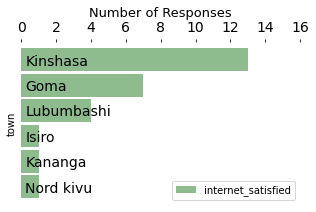

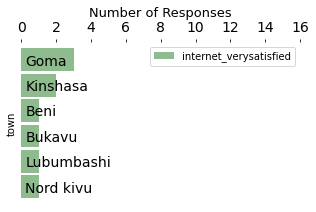

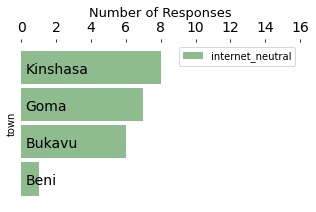

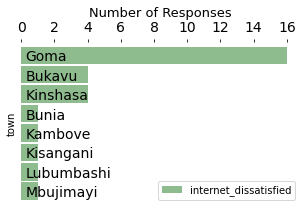

In [15]:
list_satisfied = [satisfied,internet_verysatisfied,internet_neutral, internet_dissatisfied]
for a_df in list_satisfied:
    
    a_df = a_df.iloc[::-1] ##Reversing the index to have the higher values on top


    ax = a_df.plot(kind='barh', width=.9, figsize=(5,3), color='darkseagreen')

    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    ax.yaxis.tick_right()
    ax.tick_params(axis="y", which='major', length=0)
    ax.tick_params(axis="y",direction="in", pad=-275)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('Number of Responses', fontdict={'fontsize': 13})
    ax.set_xticks([0,2,4,6,8,10,12,14,16])
    #plt.savefig('figures/network_responses.pdf', bbox_inches = 'tight')
    plt.show()


In [16]:
#Whether a business category has run some measurement or not

def internetspeedconcern():
    internetspeed = df[['town', 'speedtest_veryconcerned']][df['speedtest_veryconcerned']=="Oui"]
    internetspeed = internetspeed.groupby('town').agg({'speedtest_veryconcerned': 'count'})
    responses = pd.Series(count)
    final = pd.concat([responses, internetspeed], axis=1, join='outer')
    final.rename(columns={final.columns[0]: 'Total Number of Responses'}, inplace=True)    
    final['% Running very concerned'] = round((final['speedtest_veryconcerned']\
                                            /final['Total Number of Responses'])*100, 2)
    final = final.sort_values(by = ['Total Number of Responses'], ascending=False)
    
    internetspeed_concerned = df[['town', 'speedtest_concerned']][df['speedtest_concerned']=="Oui"]
    internetspeed_concerned = internetspeed_concerned.groupby('town').agg({'speedtest_concerned': 'count'})
    final = pd.concat([final, internetspeed_concerned], axis=1, join='outer')
    final.fillna(0, inplace=True)
    final['speedtest_concerned'] = final['speedtest_concerned'].astype(int)
    final.rename(columns={'speedtest_concerned':'concerned'}, inplace=True)
    final['% concerned'] = round((final['concerned'\
                                              ]/final['Total Number of Responses'])*100, 2)

    internetspeed_notconcerned = df[['town', 'speedtest_notconcerned']][df['speedtest_notconcerned']=="Oui"]
    internetspeed_notconcerned = internetspeed_notconcerned.groupby('town').agg({'speedtest_notconcerned': 'count'})
    final = pd.concat([final, internetspeed_notconcerned], axis=1, join='outer')
    final.fillna(0, inplace=True)
    final['speedtest_notconcerned'] = final['speedtest_notconcerned'].astype(int)
    final.rename(columns={'speedtest_notconcerned':'notconcerned'}, inplace=True)
    final['% notconcerned'] = round((final['notconcerned'\
                                              ]/final['Total Number of Responses'])*100, 2)
    internetspeed_dontcare = df[['town', 'speedtest_dontcare']][df['speedtest_dontcare']=="Oui"]
    internetspeed_dontcare = internetspeed_dontcare.groupby('town').agg({'speedtest_dontcare': 'count'})
    final = pd.concat([final, internetspeed_dontcare], axis=1, join='outer')
    final.fillna(0, inplace=True)
    final['speedtest_dontcare'] = final['speedtest_dontcare'].astype(int)
    final.rename(columns={'speedtest_dontcare':'I dont care'}, inplace=True)
    final['% I dont care'] = round((final['I dont care'\
                                              ]/final['Total Number of Responses'])*100, 2)

    return final
internetspeedconcern()

,Total Number of Responses,speedtest_veryconcerned,% Running very concerned,concerned,% concerned,notconcerned,% notconcerned,I dont care,% I dont care
Goma,31,16.0,51.61,11,35.48,5,16.13,2,6.45
Kinshasa,26,21.0,80.77,4,15.38,2,7.69,0,0.00
Bukavu,11,7.0,63.64,4,36.36,0,0.00,0,0.00
Lubumbashi,8,5.0,62.50,1,12.50,2,25.00,0,0.00
Beni,4,3.0,75.00,1,25.00,0,0.00,0,0.00
Kananga,1,1.0,100.00,0,0.00,0,0.00,0,0.00
Isiro,1,1.0,100.00,0,0.00,0,0.00,0,0.00
Mbujimayi,1,1.0,100.00,0,0.00,0,0.00,0,0.00
Bunia,1,1.0,100.00,0,0.00,0,0.00,0,0.00
Nord kivu,1,0.0,0.00,0,0.00,1,100.00,0,0.00


In [17]:
#Whether a business category has run some measurement or not

def promised(columnname):
    count =0
    a = df[['town', columnname]][df[columnname]=="Oui"]
    a = a.groupby('town').agg({columnname: 'count'})
    responses = pd.Series(count)
    final =pd.DataFrame()
    if count ==0:                            
        final = pd.concat([responses, a], axis=1, join='outer')
        final.rename(columns={final.columns[0]: 'Total Number of Responses'}, inplace=True)    
        final = final.sort_values(by = ['Total Number of Responses'], ascending=False)
    else :                            
        final = pd.concat([final, a], axis=1, join='outer')
        final.fillna(0, inplace=True)
        final[columnname] = final[columnname].astype(int)
    count+=1                             
    return final

columns = ['promise1_3mbps','promise5_10mbps','promiseless_25mbps','promisemore_1gbps','promise_notaware']
for col in columns:
    print (promised(col))

            Total Number of Responses  promise1_3mbps
0                                 0.0             NaN
Bukavu                            NaN             2.0
Goma                              NaN             8.0
Kananga                           NaN             1.0
Kinshasa                          NaN             8.0
Lubumbashi                        NaN             2.0
Nord kivu                         NaN             1.0
            Total Number of Responses  promise5_10mbps
0                                 0.0              NaN
Beni                              NaN              1.0
Bukavu                            NaN              2.0
Goma                              NaN              9.0
Isiro                             NaN              1.0
Kambove                           NaN              1.0
Kinshasa                          NaN              7.0
Lubumbashi                        NaN              4.0
           Total Number of Responses  promiseless_25mbps
0               

In [18]:
perceived_cols = ['percievedspeed1_3mbps','percievedspeed5_10mbps','percievedspeed_25mbps','percievedspeed_1gbps','percievedspeed_notaware']
for col in perceived_cols:
    print (promised(col))

            Total Number of Responses  percievedspeed1_3mbps
0                                 0.0                    NaN
Beni                              NaN                    2.0
Bukavu                            NaN                    3.0
Goma                              NaN                   10.0
Isiro                             NaN                    1.0
Kinshasa                          NaN                   10.0
Lubumbashi                        NaN                    4.0
Mbujimayi                         NaN                    1.0
            Total Number of Responses  percievedspeed5_10mbps
0                                 0.0                     NaN
Bukavu                            NaN                     2.0
Goma                              NaN                     8.0
Kambove                           NaN                     1.0
Kinshasa                          NaN                     9.0
Lubumbashi                        NaN                     1.0
          Total N

In [19]:
file.columns[93].split('[')[1].split(']')[0]

'Orange'

       Airtel  Vodacom  Orange  Supercell  Autres/Other
0         1.0      0.0     1.0        0.0           0.0
1         1.0      0.0     0.0        0.0           0.0
2         1.0      1.0     1.0        0.0           0.0
3         1.0      1.0     1.0        0.0           0.0
4         1.0      0.0     0.0        0.0           0.0
...       ...      ...     ...        ...           ...
84        1.0      1.0     1.0        0.0           0.0
85        1.0      0.0     0.0        0.0           0.0
86        1.0      0.0     0.0        0.0           0.0
87        1.0      1.0     1.0        0.0           0.0
Total    66.0     29.0    44.0        1.0           6.0

[89 rows x 5 columns]


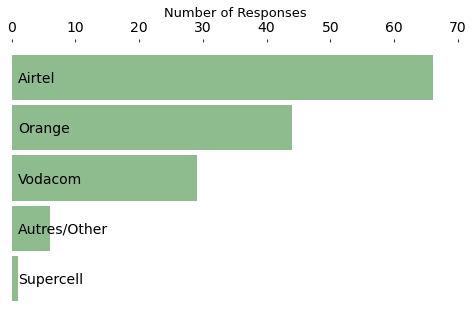

In [20]:
#Les quels de ces aspects influencent le plus votre qualite d'experience sur Internet [Le temps de chargement d'un site web / The loading time of a website]

#Purpose of Running Business
def purpose_of_measurement():
    columns =[
              'À quel fournisseur de réseau êtes-vous abonné ?/ To which network service provider are you subscribed to? [Airtel]',
              'À quel fournisseur de réseau êtes-vous abonné ?/ To which network service provider are you subscribed to? [Vodacom]',
              'À quel fournisseur de réseau êtes-vous abonné ?/ To which network service provider are you subscribed to? [Orange]',
              'À quel fournisseur de réseau êtes-vous abonné ?/ To which network service provider are you subscribed to? [Supercell]',
              'À quel fournisseur de réseau êtes-vous abonné ?/ To which network service provider are you subscribed to? [Autres/Other]']
    df1 = file[columns]
    df1.replace(('Oui', 'Non'), (1, 0), inplace=True)
    for col in df1.columns:
        name = col.split('[')[1].split(']')[0]
        df1.rename(columns={col:name}, inplace=True)
    #df1['Autres/Other'] = df1['Autres/Other'].notnull().astype(int) #Change any text in the column to 1 and NaN to 0
    df1.loc['Total',:]= df1.sum(axis=0)
    print(df1)
    data = df1.T['Total'].sort_values()
    ax = data.plot(kind='barh', width=.9, figsize=(8,5), color='darkseagreen')
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    ax.yaxis.tick_right()
    ax.tick_params(axis="y", which='major', length=0)
    ax.tick_params(axis="y",direction="in", pad=-440)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    ax.set_xlabel('Number of Responses', fontdict={'fontsize': 13})
    ax.set_xticks([0,10,20,30,40,50,60,70])
    #plt.savefig('figures/hinder.pdf', bbox_inches = 'tight')
    plt.show()
    
    return
purpose_of_measurement()

In [21]:
#participants who happen to be subscribed to both Airtel and Vodacom  OR both Airtel and Orange 
shared_networks = len (file.iloc[:,91:96][(((file.iloc[:,91]=='Oui') & (file.iloc[:,92]=='Oui')) |((file.iloc[:,91]=='Oui') & (file.iloc[:,93]=='Oui')))])
shared_percent = round (shared_networks / len (df)*100, 2)
print("{} participants use at least 2 networks, which represents {} % of the total respodants".format(shared_networks, shared_percent))

37 participants use at least 2 networks, which represents 42.05 % of the total respodants


{'option_Important': 46.59, 'option_Extremement important /Extremely important': 47.73, 'option_Pas important / Not important': 5.68}
{'option_Extremement important /Extremely important': 36.36, 'option_Important': 51.14, 'option_Pas important / Not important': 12.5}
{'option_Pas important / Not important': 5.68, 'option_Extremement important /Extremely important': 52.27, 'option_Important': 42.05}
{'option_Extremement important /Extremely important': 45.45, 'option_Important': 50.0, 'option_Pas important / Not important': 4.55}
{'option_Extremement important /Extremely important': 53.41, 'option_Important': 39.77, 'option_Pas important / Not important': 6.82}


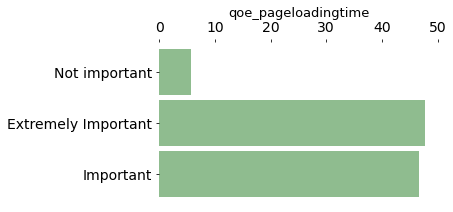

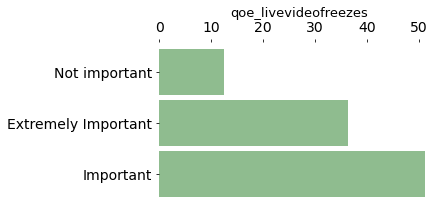

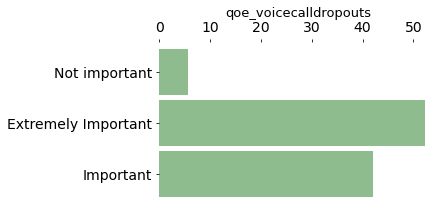

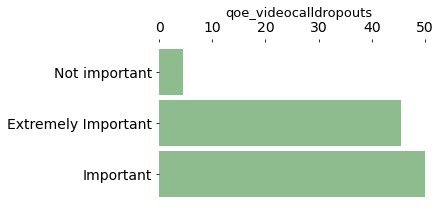

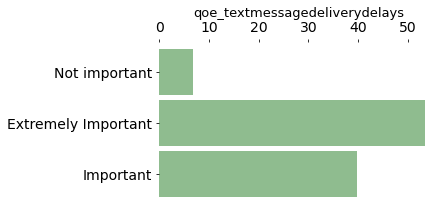

In [22]:
def likert(columnname):
    df1 = file[['town', 
              columnname]]
    
    df1.set_index('town', inplace=True)
    df1.dropna(inplace=True)
    
    likert={} 
    grouped={}
    for value in df1[columnname].unique():
        option = "option_{}".format(value)
        likert[option] = df1.loc[df1[columnname] == value]
        total = likert[option].groupby(level=0).describe()[columnname, 'count'].sum()
        percent = round((total/total_responses)*100, 2)
        grouped.update({option:percent})
    
    print(grouped)
    
    grouped['Important'] = grouped.pop('option_Important')
    grouped['Extremely Important'] = grouped.pop('option_Extremement important /Extremely important')
    grouped['Not important'] = grouped.pop('option_Pas important / Not important')
#     grouped['Satisfied'] = grouped.pop('option_4')
#     grouped['Highly Satisfied'] = grouped.pop('option_5')
    
    fig, ax = plt.subplots(figsize=(5,3))
    bars = plt.barh(*zip(*grouped.items()), height=.9, color='darkseagreen')
    
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
    ax.set_xlabel(columnname, fontdict={'fontsize': 13})
    ax.set_xticks([0, 10, 20, 30, 40, 50])
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    #plt.savefig('figures/likert.pdf', bbox_inches = 'tight')        
    return
metric_columns =['qoe_pageloadingtime','qoe_livevideofreezes','qoe_voicecalldropouts','qoe_videocalldropouts','qoe_textmessagedeliverydelays']   
for col in metric_columns:
    likert(col)

       18_25  26_35  age36_45  46_55  age56+
0        0.0    1.0       0.0    0.0     0.0
1        0.0    1.0       0.0    0.0     0.0
2        0.0    1.0       0.0    0.0     0.0
3        0.0    1.0       0.0    0.0     0.0
4        0.0    1.0       0.0    0.0     0.0
...      ...    ...       ...    ...     ...
84       0.0    0.0       1.0    0.0     0.0
85       0.0    1.0       0.0    0.0     0.0
86       1.0    0.0       0.0    0.0     0.0
87       0.0    1.0       0.0    0.0     0.0
Total   36.0   37.0      10.0    6.0     3.0

[89 rows x 5 columns]


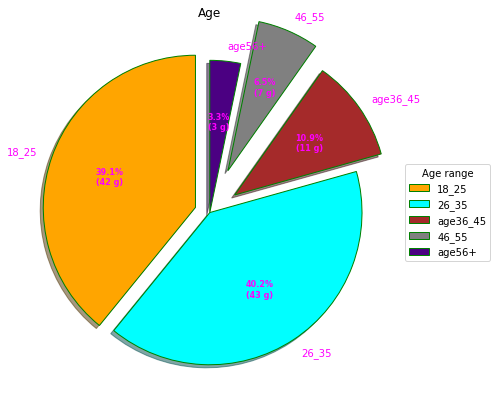

In [45]:
#Les quels de ces aspects influencent le plus votre qualite d'experience sur Internet [Le temps de chargement d'un site web / The loading time of a website]

#Purpose of Running Business
def agerange():
    columns =['age18_25','age26_35','age36_45','age46_55', 'age56+']   
    df1 = file[columns]
    df1.rename(columns ={'age18_25':'18_25','age26_35':'26_35','age46_55' :'46_55','age56':'56+'}, inplace=True)
    columns = df1.columns
    
    df1.replace(('Oui', 'Non'), (1, 0), inplace=True)
    #df1['Autres/Other'] = df1['Autres/Other'].notnull().astype(int) #Change any text in the column to 1 and NaN to 0
    df1.loc['Total',:]= df1.sum(axis=0)
    print(df1)
    data = df1.T['Total']
    explode = (0.1, 0.0, 0.2, 0.3, 0.0)
 
    # Creating color parameters
    colors = ( "orange", "cyan", "brown",
              "grey", "indigo", "beige")

    # Wedge properties
    wp = { 'linewidth' : 1, 'edgecolor' : "green" }

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct/np.sum(allvalues)*100)
        return "{:.1f}%\n({:d} g)".format(pct, absolute)

    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(data,
                                      autopct = lambda pct: func(pct, data),
                                      explode = explode,
                                      labels = columns,
                                      shadow = True,
                                      colors = colors,
                                      startangle = 90,
                                      wedgeprops = wp,
                                      textprops = dict(color ="magenta"))

    # Adding legend
    ax.legend(wedges, columns,
              title ="Age range",
              loc ="center left",
              bbox_to_anchor =(1, 0, 0.5, 1))

    plt.setp(autotexts, size = 8, weight ="bold")
    ax.set_title("Age")
    plt.savefig('ageranges.png')

    # show plot
    plt.show()
#     fig = plt.figure(figsize =(10, 7))
#     plt.pie(data, labels =columns)
    #ax = data.plot(kind='barh', width=.9, figsize=(8,5), color='darkseagreen')
#     for spine in ax.spines:
#         ax.spines[spine].set_visible(False)
        
#     ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
#     ax.yaxis.tick_right()
#     ax.tick_params(axis="y", which='major', length=0)
#     ax.tick_params(axis="y",direction="in", pad=-440)
#     ax.xaxis.tick_top()
#     ax.xaxis.set_label_position('top') 
#     ax.set_xlabel('Number of Responses', fontdict={'fontsize': 13})
#     ax.set_xticks([0,10,20,30,40,50,60,70])
    #plt.show()
    
    return
agerange()

       Male  Female  Other
0       1.0     0.0    0.0
1       1.0     0.0    0.0
2       1.0     0.0    0.0
3       1.0     0.0    0.0
4       1.0     0.0    0.0
...     ...     ...    ...
84      1.0     0.0    0.0
85      1.0     0.0    0.0
86      1.0     0.0    0.0
87      1.0     0.0    0.0
Total  69.0    20.0    1.0

[89 rows x 3 columns]


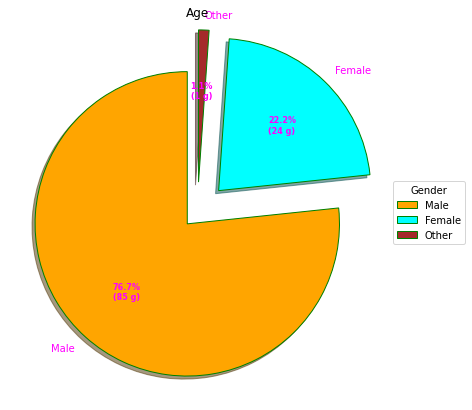

In [40]:
#Les quels de ces aspects influencent le plus votre qualite d'experience sur Internet [Le temps de chargement d'un site web / The loading time of a website]

#Purpose of Running Business
def gender():
    columns =['genderM','genderF','otherGender']   
    df1 = file[columns]
    df1.rename(columns ={'genderM':'Male','genderF':'Female','otherGender' :'Other'}, inplace=True)
    columns = df1.columns
    df1.replace(('Oui', 'Non'), (1, 0), inplace=True)
    #df1['Autres/Other'] = df1['Autres/Other'].notnull().astype(int) #Change any text in the column to 1 and NaN to 0
    df1.loc['Total',:]= df1.sum(axis=0)
    print(df1)
    data = df1.T['Total']
    explode = (0.1, 0.2, 0.2)
 
    # Creating color parameters
    colors = ( "orange", "cyan", "brown",
              "grey", "indigo", "beige")

    # Wedge properties
    wp = { 'linewidth' : 1, 'edgecolor' : "green" }

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct/np.sum(allvalues)*100)
        return "{:.1f}%\n({:d} g)".format(pct, absolute)

    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(data,
                                      autopct = lambda pct: func(pct, data),
                                      explode = explode,
                                      labels = columns,
                                      shadow = True,
                                      colors = colors,
                                      startangle = 90,
                                      wedgeprops = wp,
                                      textprops = dict(color ="magenta"))

    # Adding legend
    ax.legend(wedges, columns,
              title ="Gender",
              loc ="center left",
              bbox_to_anchor =(1, 0, 0.5, 1))

    plt.setp(autotexts, size = 8, weight ="bold")
    ax.set_title("Age")
    plt.savefig('gender.png')

    # show plot
    plt.show()
#     fig = plt.figure(figsize =(10, 7))
#     plt.pie(data, labels =columns)
    #ax = data.plot(kind='barh', width=.9, figsize=(8,5), color='darkseagreen')
#     for spine in ax.spines:
#         ax.spines[spine].set_visible(False)
        
#     ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
#     ax.yaxis.tick_right()
#     ax.tick_params(axis="y", which='major', length=0)
#     ax.tick_params(axis="y",direction="in", pad=-440)
#     ax.xaxis.tick_top()
#     ax.xaxis.set_label_position('top') 
#     ax.set_xlabel('Number of Responses', fontdict={'fontsize': 13})
#     ax.set_xticks([0,10,20,30,40,50,60,70])
    #plt.show()
    
    return
gender()

       student  self_employed  employed  unemployed otherOccupation
0          0.0            1.0       0.0         0.0             NaN
1          0.0            1.0       0.0         0.0             NaN
2          0.0            1.0       0.0         0.0             NaN
3          1.0            1.0       0.0         0.0             NaN
4          0.0            0.0       1.0         0.0             NaN
...        ...            ...       ...         ...             ...
84         0.0            1.0       0.0         0.0             NaN
85         1.0            0.0       0.0         0.0             NaN
86         0.0            1.0       0.0         0.0             NaN
87         1.0            0.0       0.0         0.0             NaN
Total     30.0           26.0      30.0        10.0             NaN

[89 rows x 5 columns]


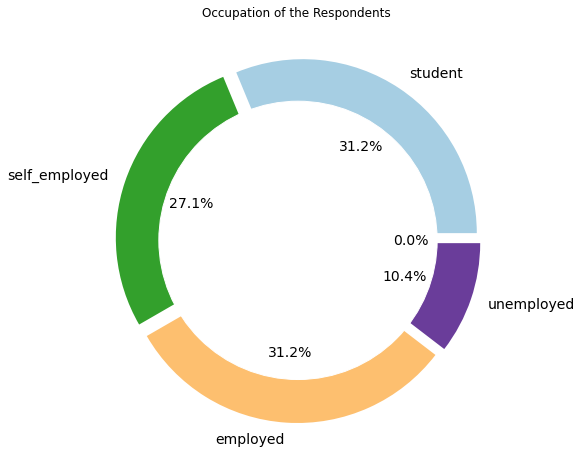

In [44]:

def occupation():
    columns =['student','self_employed','employed','unemployed','otherOccupation']   
    df1 = file[columns]
    columns = df1.columns
    df1.replace(('Oui', 'Non'), (1, 0), inplace=True)
    df1.loc['Total',:]= df1.sum(axis=0)
    print(df1)
    data = df1.T['Total']
    
    my_circle = plt.Circle( (0,0), 0.8, color='white')
    df1.T['Total'].plot(figsize=(8, 8),kind='pie',fontsize = 14, colormap='Paired', autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 
                                                                                                         0.05, 0.05))
    

    plt.title('Occupation of the Respondents ')
    plt.axis('off')
    p = plt.gcf()
    p.gca().add_artist(my_circle)
    plt.savefig('occupation.png')
    plt.show()

occupation()
